# MOwNiT 

## Laboratorium

### Interpolacja

In [16]:
import Pkg; Pkg.add("Interpolations")

 Resolving package versions...
 Installed Ratios ─────────── v0.3.1
 Installed WoodburyMatrices ─ v0.5.1
 Installed AxisAlgorithms ─── v1.0.0
 Installed OffsetArrays ───── v1.0.3
 Installed Compat ─────────── v2.2.0
 Installed Interpolations ─── v0.12.8
  Updating `C:\Users\jacek\.julia\environments\v1.3\Project.toml`
  [a98d9a8b] + Interpolations v0.12.8
  Updating `C:\Users\jacek\.julia\environments\v1.3\Manifest.toml`
  [13072b0f] + AxisAlgorithms v1.0.0
  [34da2185] ↓ Compat v3.8.0 ⇒ v2.2.0
  [a98d9a8b] + Interpolations v0.12.8
  [6fe1bfb0] + OffsetArrays v1.0.3
  [c84ed2f1] + Ratios v0.3.1
  [efce3f68] + WoodburyMatrices v0.5.1


In [23]:
using Plots

In [24]:
# wylosowanie węzłów interpolacji
xs =  1:1:10
A = [rand() for x in xs]

10-element Array{Float64,1}:
 0.010744513624950658
 0.453245057404998   
 0.5945738254370052  
 0.540445278070609   
 0.6764094643428962  
 0.9417413748920971  
 0.8446544443219723  
 0.1823764688300311  
 0.39587006369521216 
 0.6058444732284995  

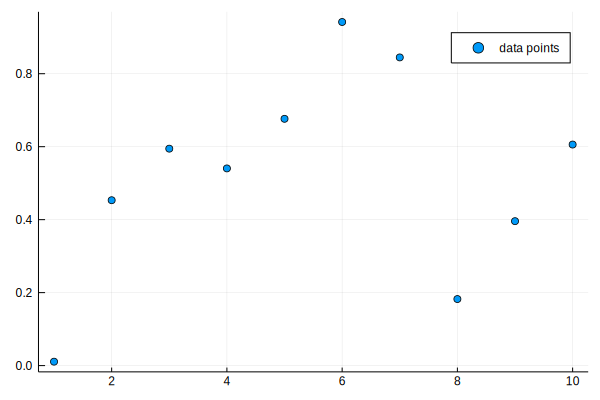

In [37]:
scatter(xs,A, label="data points")

In [38]:
# gęste punkty do rysowania wykresów funkcji interpolujacych
xsf=1:0.01:10

1.0:0.01:10.0

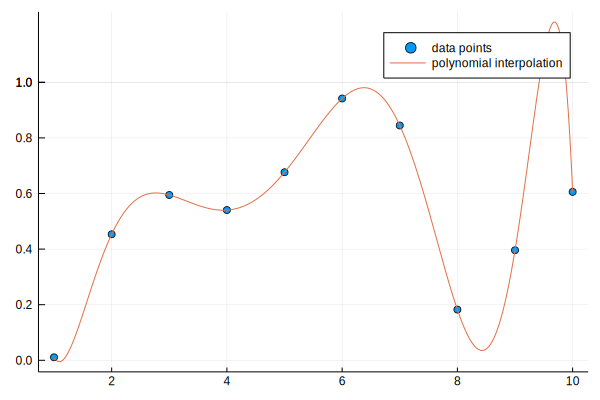

In [39]:
# interpolacja wielomianowa w pakiecie Polynomials
using Polynomials
fit1=polyfit(xs, A)
B=[fit1(x) for x in xsf]
plot!(xsf,B, label="polynomial interpolation")

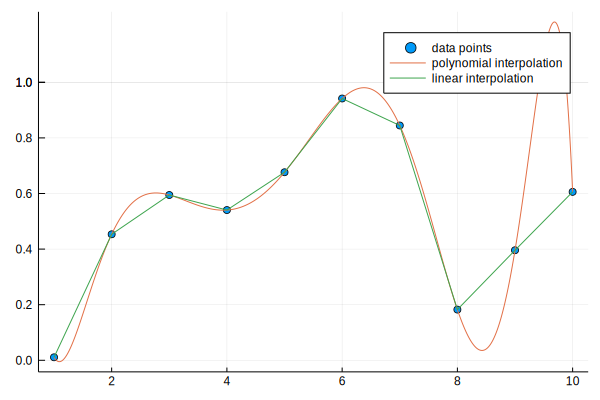

In [40]:
#  interpolacja liniowa z pakietu Interpolations - przykład
using Interpolations
interp_linear = LinearInterpolation(xs, A)
B=[interp_linear(x) for x in xsf]
plot!(xsf,B, label="linear interpolation")

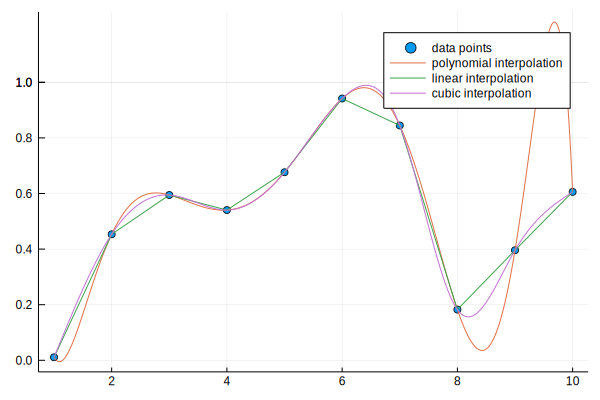

In [41]:
#  interpolacja szescienna 
interp_cubic = CubicSplineInterpolation(xs, A)
B2=[interp_cubic(x) for x in xsf]
plot!(xsf,B2, label="cubic interpolation")

In [42]:
#Interpolacja szescienna to BSpline z warunkami brzegowymi Line i OnGrid. 
#Więcej o konfiguracji warunkow brzegowych w
# dokumentacji https://github.com/JuliaMath/Interpolations.jl/blob/master/doc/Interpolations_algebra.pdf
interp_cubic

10-element extrapolate(scale(interpolate(OffsetArray(::Array{Float64,1}, 0:11), BSpline(Cubic(Line(OnGrid())))), (1:1:10,)), Throw()) with element type Float64:
 0.010744513624950658
 0.45324505740499793 
 0.5945738254370052  
 0.540445278070609   
 0.6764094643428962  
 0.9417413748920971  
 0.8446544443219725  
 0.1823764688300311  
 0.3958700636952122  
 0.6058444732284995  

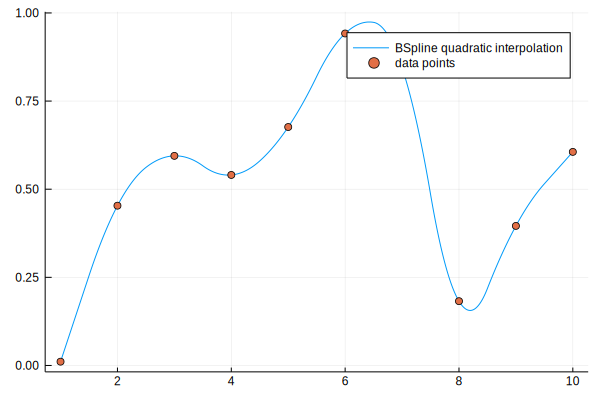

In [43]:
# Przyklad konfiguracji  BSpline-ów
itp = interpolate(A, BSpline(Quadratic(Line(OnCell()))))
B=[itp(x) for x in xsf]
plot(xsf,B, label="BSpline quadratic interpolation")
scatter!(xs,A, label="data points")

### Zadania
1. Napisać własną implementację interpolacji wielomianowej stosując wprost wzór na <a href="https://www.icsr.agh.edu.pl/~mownit/pdf/03_interpolation_v2.pdf"> wielomian interpolacyjny  Lagrange'a </a>.  Przetestować swoją implementację na wylosowanych węzłach interpolacji w wybranym przedziale. Narysować wykres wielomianu interpolacyjnego w tym przedziale wraz z wezlami interpolacji. 

1. Zrobic to samo dla metody <a href="https://www.icsr.agh.edu.pl/~mownit/pdf/03_interpolation_v2.pdf"> Newtona (metoda ilorazów róznicowych)</a>. Zadbać o to, żeby ilorazy wyliczać tylko raz dla danego zbioru wezłow interpolacji, według schematu z pakietu Interpolations http://juliamath.github.io/Interpolations.jl/stable/interpolations/ : 
   1. napisać funkcję `NewtonInterpolation`, która wylicza ilorazy różnicowe i zwraca "obiekt interpolacyjny" `newt`
   1. napisać funkcję która wylicza wartość wielomianu dla obiektu `newt` w punkcie x.
   
1. Narysować wykres wielomianu interpolacyjnego dla tych samych danych, co w poprzednim punkcie.

1. Zastosowac interpolację wielomianową z pakietu Polynomials  do tych samych danych, co w poprzednich punktach. Porównać wszystkie 3 wyniki interpolacji wielomianowej na jednym wykresie. Co zauważamy? Dlaczego?

1. Porownać metody poprzez pomiar czasu wykonania dla zmiennej ilości węzłow interpolacji. Uwaga: dla metody Newtona i pakietu Polynomials należy osobno zmierzyć czas wyliczania wielomianu i osobno czas wyliczania wartości w punkcie. Dokonac pomiaru 10 razy i policzyc wartość średnią oraz oszacować bład pomiaru za pomoca odchylenia standardowego.  Narzedzie do analizy danych do wyboru (Julia, R)

1. Poeksperymentować z  interpolacją funkcjami sklejanymi (minimum dwie różne funkcje sklejane),  narysować wykresy i porównać z wykresami interpolacji wielomianowej. 

- Zademonstrować  efekt Rungego. 

